<a href="https://www.kaggle.com/code/sohaelshafey/depression-eda-insights?scriptVersionId=159761058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rhmcd-20-depression/mental_health_finaldata_1.csv
/kaggle/input/rhmcd-20-depression/questions.docx


# Data loading

In [2]:
df = pd.read_csv('/kaggle/input/rhmcd-20-depression/mental_health_finaldata_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      799 non-null    object
 1   Sex                      799 non-null    object
 2   Occupation               799 non-null    object
 3   Days Indoors             799 non-null    object
 4   Growing Stress           799 non-null    object
 5   Quarantine Frustrations  799 non-null    object
 6   Changes Habits           799 non-null    object
 7   Mental Health History    799 non-null    object
 8   Weight Change            799 non-null    object
 9   Mood Swings              799 non-null    object
 10  Coping Struggles         799 non-null    object
 11  Work Interest            799 non-null    object
 12  Social Weakness          799 non-null    object
dtypes: object(13)
memory usage: 81.3+ KB


In [3]:
#Check nulls and unique values
for col in df.columns:
    print("column",col,"null values:",df[col].isnull().sum())
    print("column",col,"uniques counts:",df[col].nunique())
    print(df[col].value_counts())
    print("------------------------------------------------")

column Age null values: 0
column Age uniques counts: 4
Age
30-Above    217
16-20       202
25-30       199
20-25       181
Name: count, dtype: int64
------------------------------------------------
column Sex null values: 0
column Sex uniques counts: 2
Sex
Female    425
Male      374
Name: count, dtype: int64
------------------------------------------------
column Occupation null values: 0
column Occupation uniques counts: 5
Occupation
Housewife    182
Student      172
Corporate    155
Others       149
Business     141
Name: count, dtype: int64
------------------------------------------------
column Days Indoors null values: 0
column Days Indoors uniques counts: 5
Days Indoors
31-60 days            168
1-14 days             165
Go out Every day      162
More than 2 months    154
15-30 days            150
Name: count, dtype: int64
------------------------------------------------
column Growing Stress null values: 0
column Growing Stress uniques counts: 3
Growing Stress
Yes      292
Mayb

In [4]:
df.describe()

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
count,799,799,799,799,799,799,799,799,799,799,799,799,799
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,Maybe,Maybe,Low,No,No,Maybe
freq,217,425,182,168,292,298,302,276,271,271,401,285,273


# EDAs and statistics

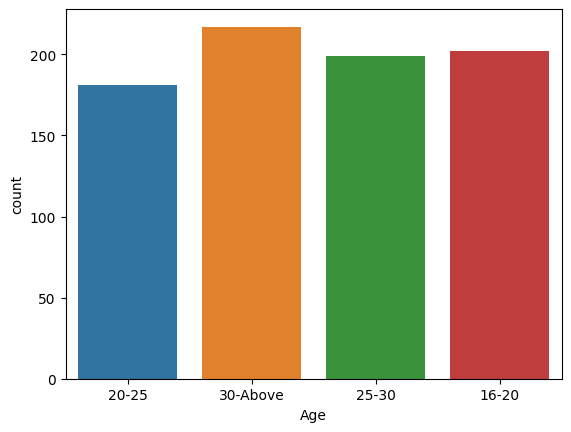

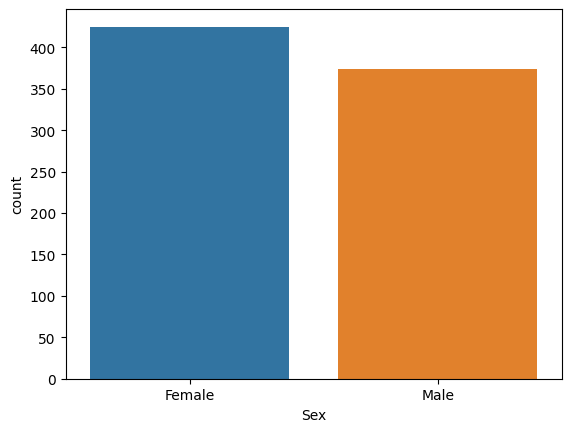

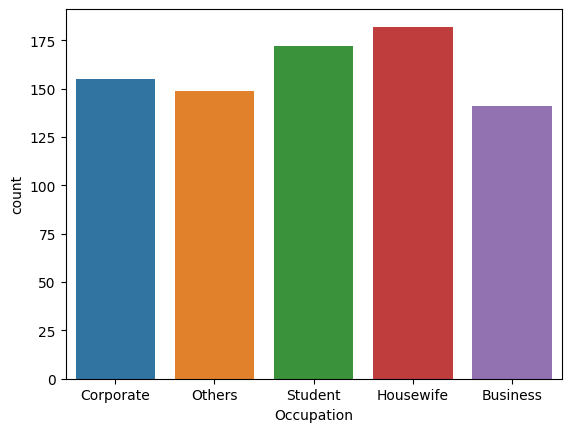

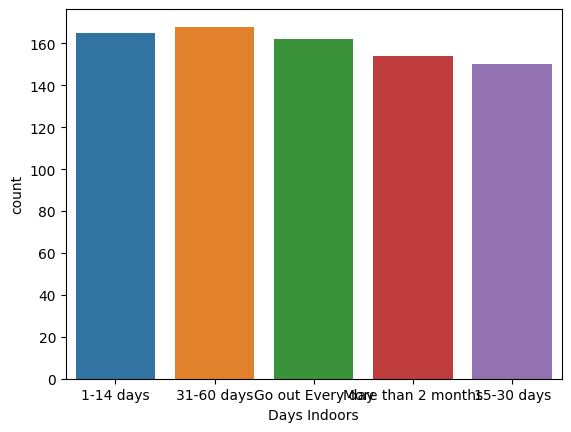

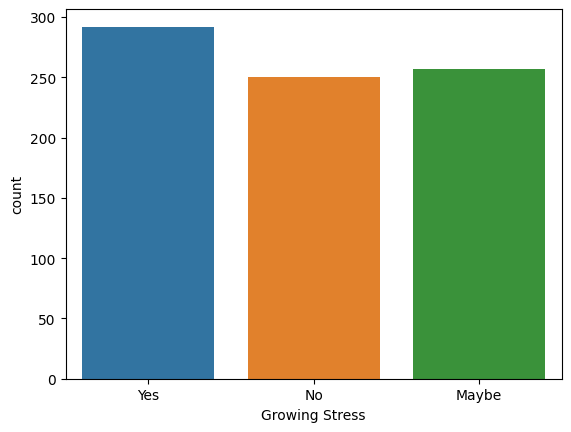

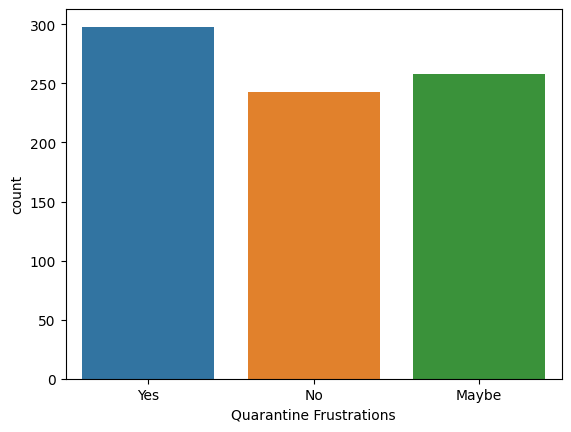

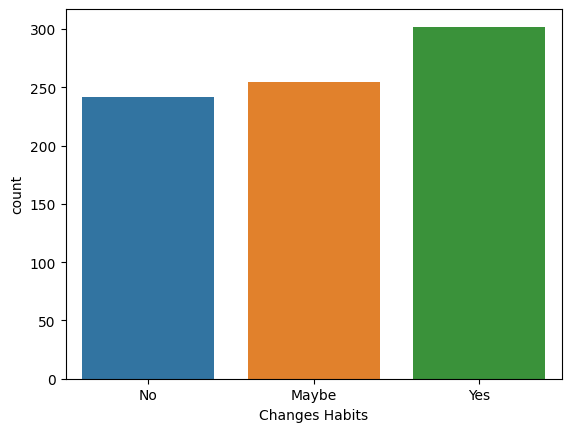

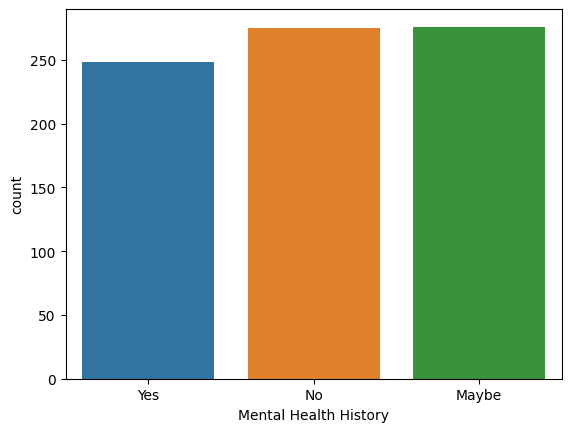

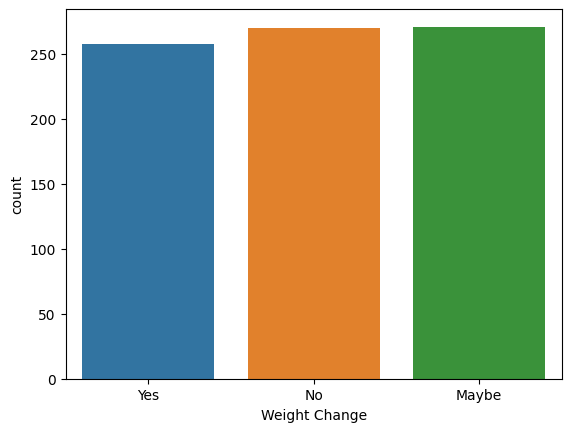

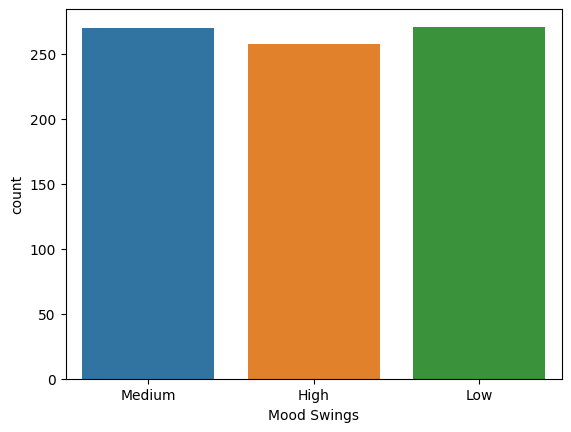

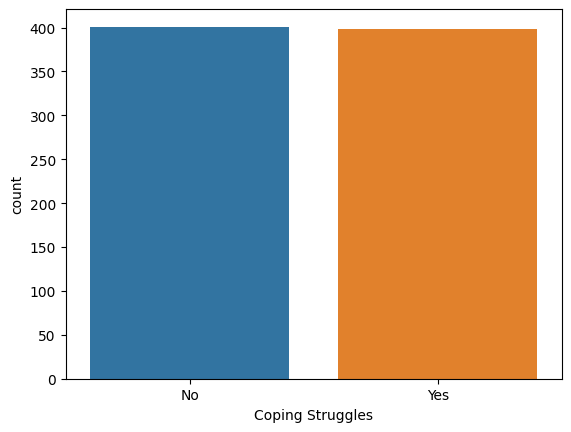

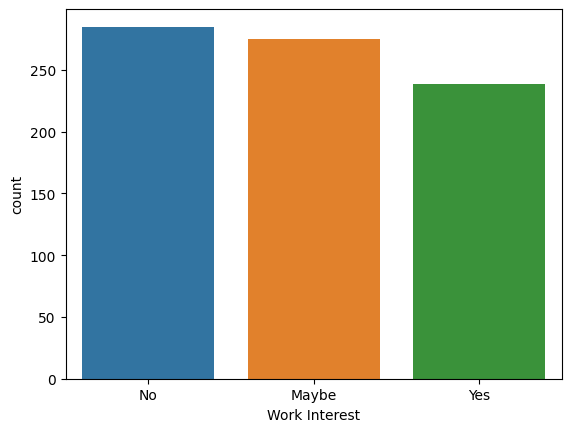

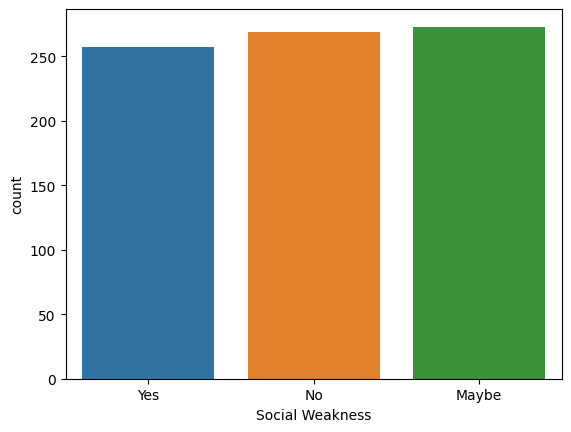

In [5]:
for n in df.columns:
    sns.countplot(x=n,data=df)
    plt.show()

In [6]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v_value = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return cramers_v_value
# Example usage
for x in df.columns:
    for y in df.columns:
        if x!=y:
            cramers_v_value = cramers_v(df[x], df[y])
            if round(cramers_v_value,2) >0:
                print(x,y,f"Cramér's V Value: {round(cramers_v_value,2)}")


Age Occupation Cramér's V Value: 0.02
Age Days Indoors Cramér's V Value: 0.06
Age Growing Stress Cramér's V Value: 0.01
Age Quarantine Frustrations Cramér's V Value: 0.02
Age Changes Habits Cramér's V Value: 0.02
Age Weight Change Cramér's V Value: 0.05
Age Social Weakness Cramér's V Value: 0.06
Sex Growing Stress Cramér's V Value: 0.06
Sex Mental Health History Cramér's V Value: 0.01
Sex Weight Change Cramér's V Value: 0.06
Sex Coping Struggles Cramér's V Value: 0.06
Occupation Age Cramér's V Value: 0.02
Occupation Days Indoors Cramér's V Value: 0.05
Occupation Weight Change Cramér's V Value: 0.08
Occupation Mood Swings Cramér's V Value: 0.03
Occupation Coping Struggles Cramér's V Value: 0.03
Days Indoors Age Cramér's V Value: 0.06
Days Indoors Occupation Cramér's V Value: 0.05
Days Indoors Growing Stress Cramér's V Value: 0.04
Days Indoors Mental Health History Cramér's V Value: 0.03
Days Indoors Coping Struggles Cramér's V Value: 0.02
Days Indoors Social Weakness Cramér's V Value: 0

In [7]:
for c in df.columns:
    df[c]= df[c].astype('category').cat.codes
df.corr()

,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,Mood Swings,Coping Struggles,Work Interest,Social Weakness
Age,1.000000,-0.010449,-0.006471,0.046297,-0.042321,-0.066744,0.069461,0.025946,-0.022946,0.025048,-0.012507,0.026647,-0.000498
Sex,-0.010449,1.000000,-0.030977,-0.030815,-0.073884,0.006858,0.021081,0.034432,-0.061402,0.035128,-0.071726,-0.041185,0.004588
Occupation,-0.006471,-0.030977,1.000000,0.018282,-0.018934,-0.064494,-0.016490,0.004398,0.040744,-0.072744,0.003781,-0.031933,-0.023027
Days Indoors,0.046297,-0.030815,0.018282,1.000000,-0.070318,-0.009062,0.016617,-0.059640,-0.019821,0.013272,0.049684,-0.054824,-0.065642
Growing Stress,-0.042321,-0.073884,-0.018934,-0.070318,1.000000,0.067634,-0.096323,-0.042559,-0.026820,0.021345,-0.004337,0.019970,-0.000555
Quarantine Frustrations,-0.066744,0.006858,-0.064494,-0.009062,0.067634,1.000000,-0.063801,-0.002969,-0.013578,0.015533,0.009244,-0.011633,0.005171
Changes Habits,0.069461,0.021081,-0.016490,0.016617,-0.096323,-0.063801,1.000000,0.060637,-0.037378,0.067104,0.016795,0.020863,-0.035176
Mental Health History,0.025946,0.034432,0.004398,-0.059640,-0.042559,-0.002969,0.060637,1.000000,0.056179,0.040769,0.027682,0.013017,0.000835
Weight Change,-0.022946,-0.061402,0.040744,-0.019821,-0.026820,-0.013578,-0.037378,0.056179,1.000000,0.042012,0.044540,-0.051075,0.024072
Mood Swings,0.025048,0.035128,-0.072744,0.013272,0.021345,0.015533,0.067104,0.040769,0.042012,1.000000,0.006229,-0.014344,-0.016567


In [8]:
correlation_matrix = df.corr()
# Identify highly correlated columns
highly_correlated_vars = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Check if col1 and col2 are different before adding to the set
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8 and (col2, col1) not in highly_correlated_vars:
            highly_correlated_vars.add((col1, col2))
# Convert the set to a list
highly_correlated_vars_list = list(highly_correlated_vars)
print("Highly Correlated Variables:")
print(highly_correlated_vars_list)
# Identify weakly correlated columns
weakly_correlated_vars = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Check if col1 and col2 are different before adding to the set
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) < 0.5 and (col2, col1) not in weakly_correlated_vars:
            weakly_correlated_vars.add((col1, col2))
# Convert the set to a list
weakly_correlated_vars_list = list(weakly_correlated_vars)
print("\nWeakly Correlated Variables:")
print(weakly_correlated_vars_list)


Highly Correlated Variables:
[]

Weakly Correlated Variables:
[('Growing Stress', 'Weight Change'), ('Growing Stress', 'Changes Habits'), ('Mental Health History', 'Coping Struggles'), ('Days Indoors', 'Mental Health History'), ('Age', 'Mental Health History'), ('Sex', 'Occupation'), ('Occupation', 'Mood Swings'), ('Quarantine Frustrations', 'Weight Change'), ('Sex', 'Changes Habits'), ('Changes Habits', 'Social Weakness'), ('Age', 'Days Indoors'), ('Quarantine Frustrations', 'Work Interest'), ('Growing Stress', 'Social Weakness'), ('Mental Health History', 'Weight Change'), ('Weight Change', 'Coping Struggles'), ('Changes Habits', 'Mood Swings'), ('Sex', 'Social Weakness'), ('Days Indoors', 'Coping Struggles'), ('Age', 'Coping Struggles'), ('Changes Habits', 'Mental Health History'), ('Mood Swings', 'Social Weakness'), ('Work Interest', 'Social Weakness'), ('Mental Health History', 'Work Interest'), ('Quarantine Frustrations', 'Changes Habits'), ('Growing Stress', 'Mental Health Histo

All features are weakly correlated 
then feature engineering

# Polynomial feature extraction

In [9]:
df.values.shape

(799, 13)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
# Create an instance of PolynomialFeatures with the desired degree
degree = 2  # You can adjust the degree as needed
poly = PolynomialFeatures(degree)
# Transform your original features to include polynomial features
X_poly = poly.fit_transform(df)
# Convert the result back to a DataFrame for better readability
X_poly_df = pd.DataFrame(X_poly,columns=poly.get_feature_names_out(df.columns))

In [11]:
X_poly_df.columns

Index(['1', 'Age', 'Sex', 'Occupation', 'Days Indoors', 'Growing Stress',
       'Quarantine Frustrations', 'Changes Habits', 'Mental Health History',
       'Weight Change',
       ...
       'Mood Swings^2', 'Mood Swings Coping Struggles',
       'Mood Swings Work Interest', 'Mood Swings Social Weakness',
       'Coping Struggles^2', 'Coping Struggles Work Interest',
       'Coping Struggles Social Weakness', 'Work Interest^2',
       'Work Interest Social Weakness', 'Social Weakness^2'],
      dtype='object', length=105)

In [12]:
X_poly_df 

,1,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,...,Mood Swings^2,Mood Swings Coping Struggles,Mood Swings Work Interest,Mood Swings Social Weakness,Coping Struggles^2,Coping Struggles Work Interest,Coping Struggles Social Weakness,Work Interest^2,Work Interest Social Weakness,Social Weakness^2
0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,...,4.0,0.0,2.0,4.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,3.0,1.0,3.0,2.0,2.0,2.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
2,1.0,3.0,0.0,4.0,3.0,1.0,1.0,2.0,1.0,1.0,...,4.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0,...,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
4,1.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,...,4.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,1.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
795,1.0,2.0,1.0,4.0,3.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
796,1.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0,1.0,0.0,...,4.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
797,1.0,3.0,0.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0


In [13]:
X_poly.shape

(799, 105)

When you apply PolynomialFeatures with degree 2 to a dataset with 13 features, it generates not only the original features but also all possible combinations of pairs of features and squares of individual features. 

In [14]:
X_poly_df.corr()

,1,Age,Sex,Occupation,Days Indoors,Growing Stress,Quarantine Frustrations,Changes Habits,Mental Health History,Weight Change,...,Mood Swings^2,Mood Swings Coping Struggles,Mood Swings Work Interest,Mood Swings Social Weakness,Coping Struggles^2,Coping Struggles Work Interest,Coping Struggles Social Weakness,Work Interest^2,Work Interest Social Weakness,Social Weakness^2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.010449,-0.006471,0.046297,-0.042321,-0.066744,0.069461,0.025946,-0.022946,...,0.037017,0.010132,0.043421,-0.008397,-0.012507,-0.009999,-0.003102,0.015678,-0.002506,-0.014086
Sex,NaN,-0.010449,1.000000,-0.030977,-0.030815,-0.073884,0.006858,0.021081,0.034432,-0.061402,...,0.030435,-0.056356,-0.027649,0.059657,-0.071726,-0.061130,-0.071699,-0.043860,-0.041288,0.004301
Occupation,NaN,-0.006471,-0.030977,1.000000,0.018282,-0.018934,-0.064494,-0.016490,0.004398,0.040744,...,-0.078055,-0.032504,-0.076780,-0.063960,0.003781,-0.022066,-0.011404,-0.039118,-0.014419,-0.022829
Days Indoors,NaN,0.046297,-0.030815,0.018282,1.000000,-0.070318,-0.009062,0.016617,-0.059640,-0.019821,...,0.013015,0.032868,-0.009353,-0.038151,0.049684,-0.003976,0.001310,-0.052369,-0.087922,-0.069319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Coping Struggles Work Interest,NaN,-0.009999,-0.061130,-0.022066,-0.003976,0.005339,-0.007551,0.018247,-0.003952,-0.001899,...,-0.021251,0.416204,0.334512,-0.003766,0.633911,1.000000,0.418676,0.524361,0.361178,0.022907
Coping Struggles Social Weakness,NaN,-0.003102,-0.071699,-0.011404,0.001310,-0.027532,0.000930,0.001730,0.000742,0.029440,...,-0.030990,0.423273,-0.036680,0.344341,0.671849,0.418676,1.000000,-0.018583,0.321215,0.536350
Work Interest^2,NaN,0.015678,-0.043860,-0.039118,-0.052369,0.032611,-0.005574,0.017279,0.020118,-0.045444,...,-0.030921,-0.019568,0.583399,-0.041037,-0.006317,0.524361,-0.018583,1.000000,0.567884,-0.024007
Work Interest Social Weakness,NaN,-0.002506,-0.041288,-0.014419,-0.087922,0.029263,-0.007518,0.022890,0.021021,-0.014516,...,-0.043118,-0.017773,0.339858,0.359884,0.021670,0.361178,0.321215,0.567884,1.000000,0.581809


In [15]:
correlation_matrix = X_poly_df.corr()
# Identify highly correlated columns
highly_correlated_vars = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Check if col1 and col2 are different before adding to the set
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8 and (col2, col1) not in highly_correlated_vars:
            highly_correlated_vars.add((col1, col2))
# Convert the set to a list
highly_correlated_vars_list = list(highly_correlated_vars)
print("Highly Correlated Variables:")
print(len(highly_correlated_vars_list))
# Identify weakly correlated columns
weakly_correlated_vars = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Check if col1 and col2 are different before adding to the set
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) < 0.5 and (col2, col1) not in weakly_correlated_vars:
            weakly_correlated_vars.add((col1, col2))
# Convert the set to a list
weakly_correlated_vars_list = list(weakly_correlated_vars)
print("\nWeakly Correlated Variables:")
print(len(weakly_correlated_vars_list))


Highly Correlated Variables:
13

Weakly Correlated Variables:
5044


# Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Initialise the Scaler
scaler = StandardScaler()
# To scale data
df_scaled = scaler.fit_transform(X_poly_df)

# PCA

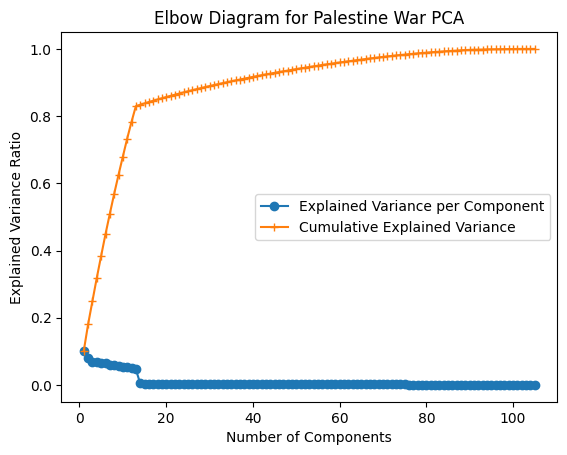

In [17]:
from sklearn.decomposition import PCA
components_range=range(1,len(X_poly_df.columns)+1)
for n in components_range:
    pca = PCA(n_components=n)
    pca.fit(df_scaled)
pca = PCA(n_components=len(X_poly_df.columns))
pca.fit(df_scaled)
# Calculate explained variance and cumulative explained variance for this iteration
explained_variance=pca.explained_variance_ratio_
cumulative_explained_variance=np.cumsum(pca.explained_variance_ratio_)
# Plot explained variance
plt.plot(components_range, explained_variance,marker='o', label='Explained Variance per Component')
# Plot cumulative explained variance
plt.plot(components_range, cumulative_explained_variance,marker='+', label='Cumulative Explained Variance')
# Customize plot
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Diagram for Palestine War PCA')
plt.legend()

In [18]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

# clustering 

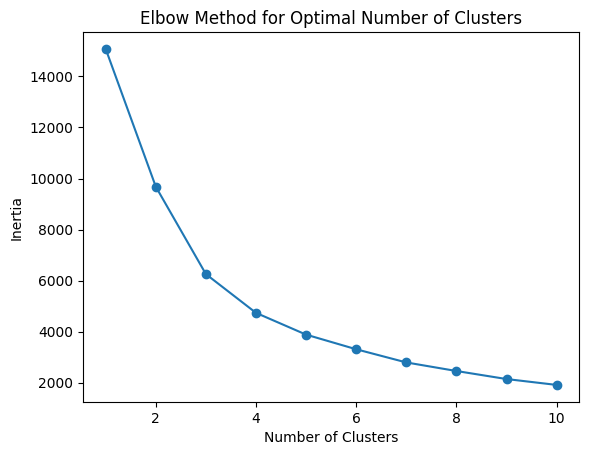

In [19]:
from sklearn.cluster import KMeans,AgglomerativeClustering
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [20]:
n_clus=2
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=n_clus, random_state=42)
kmeans.fit(pca_df)
print("evaluation for ",n_clus," clusters on data using kmeans:")
silhouette_score(pca_df, kmeans.labels_)

evaluation for  2  clusters on data using kmeans:


0.3375782427567055

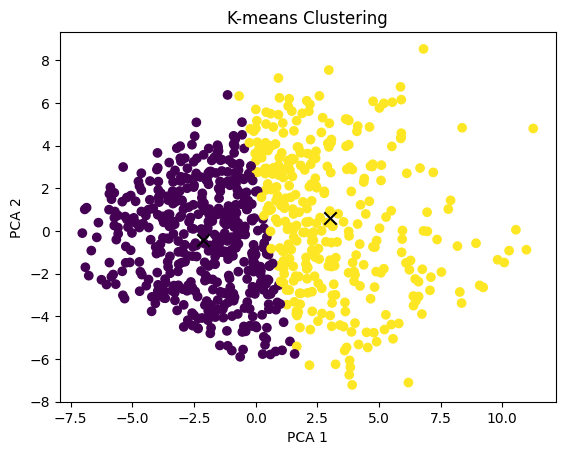

In [21]:
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering')
# Optionally plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='black', marker='x')
plt.show()

In [22]:
agg_cluster = AgglomerativeClustering(n_clusters=n_clus, linkage='ward', affinity='euclidean')
cluster_labels = agg_cluster.fit_predict(pca_df)
# Step 5: Evaluate Clustering Performance with Silhouette Score
silhouette_avg = silhouette_score(pca_df, cluster_labels)
print(f"Silhouette Score using agglomerative : {silhouette_avg}")

Silhouette Score using agglomerative : 0.24807834833947812


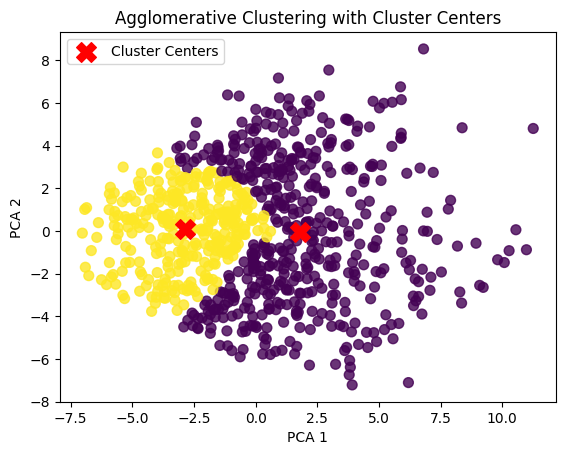

In [23]:
# Compute cluster centers manually
cluster_centers = np.array([pca_df[cluster_labels == i].mean(axis=0) for i in range(agg_cluster.n_clusters_)])

# Plotting the data points
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Adding labels and legend
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Agglomerative Clustering with Cluster Centers')
plt.legend()

# Display the plot
plt.show()

# Countplots after Kmeans

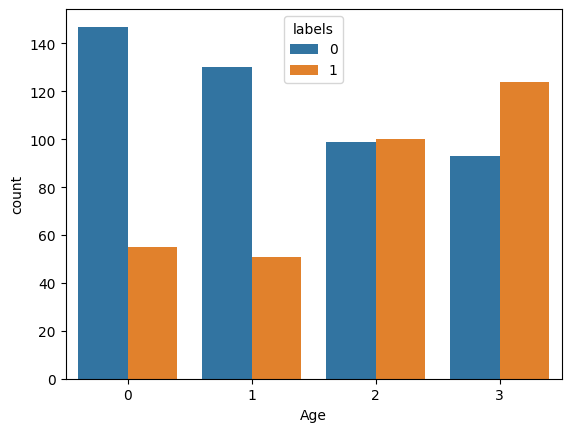

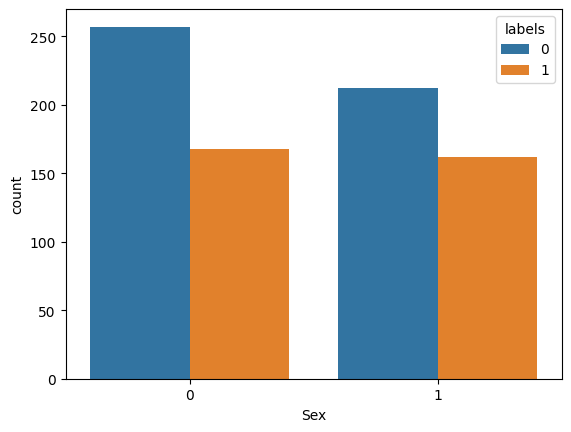

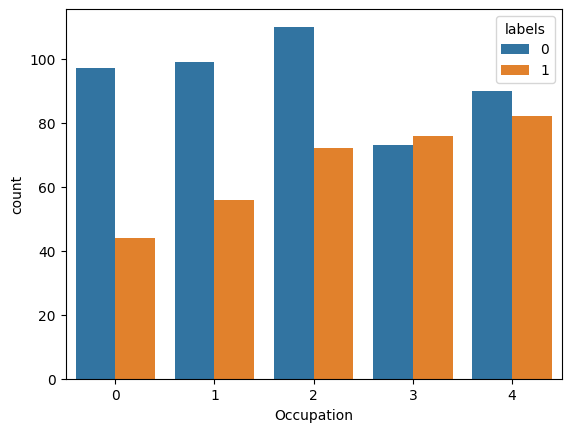

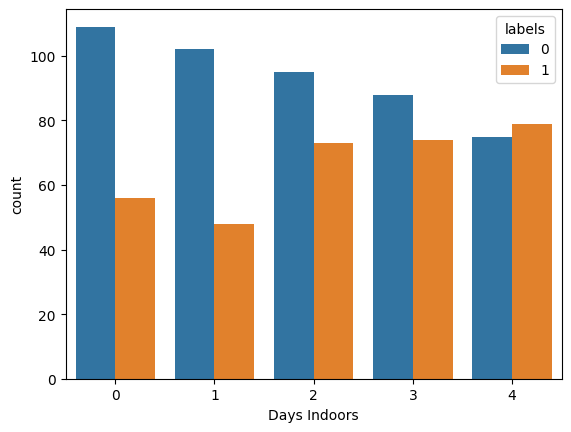

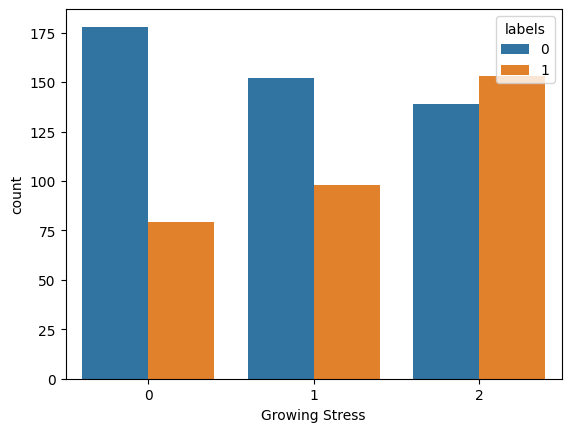

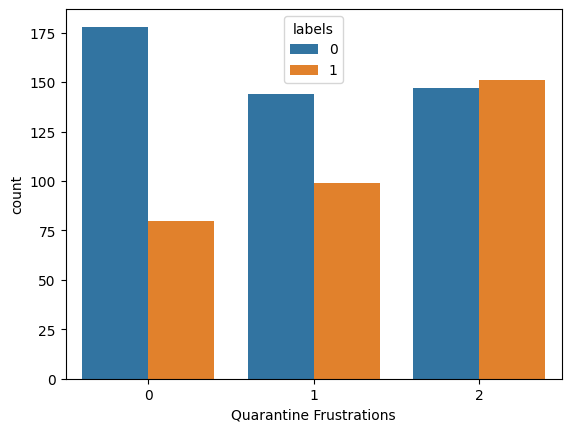

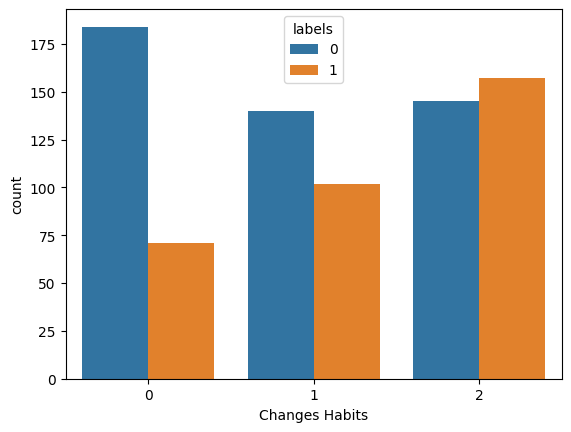

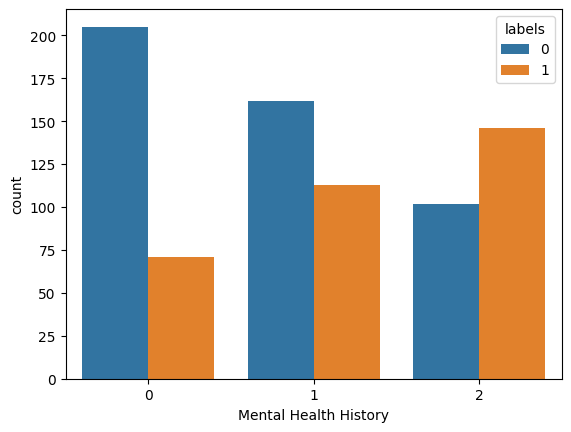

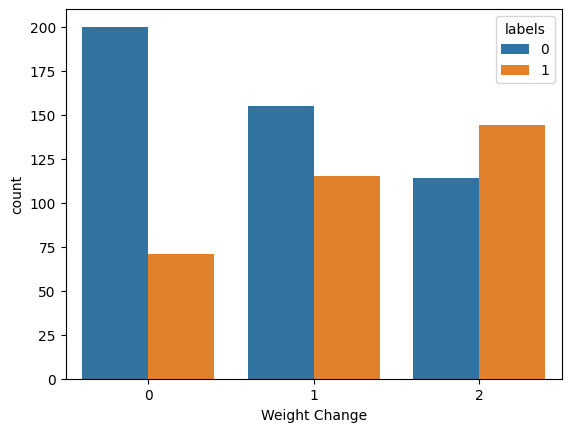

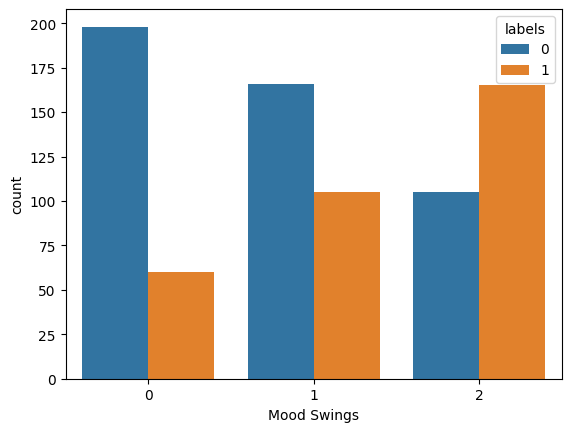

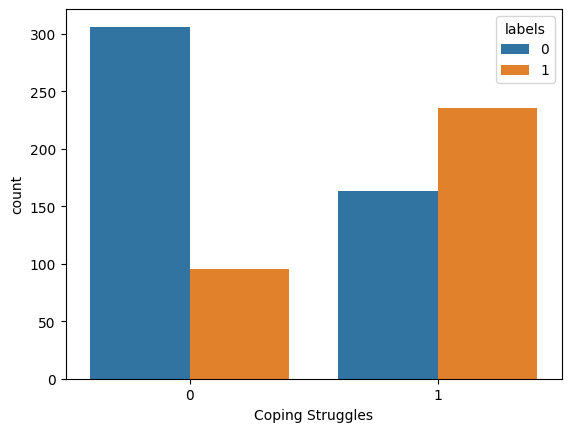

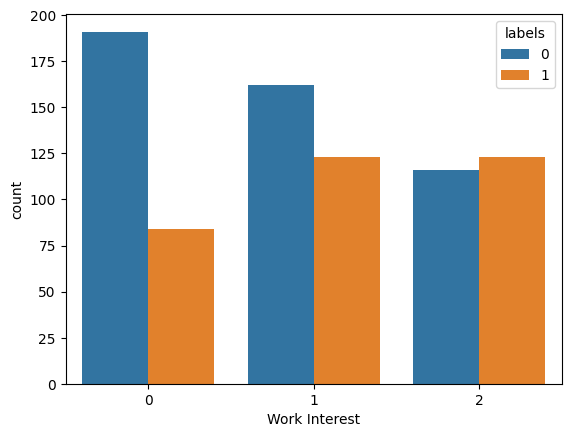

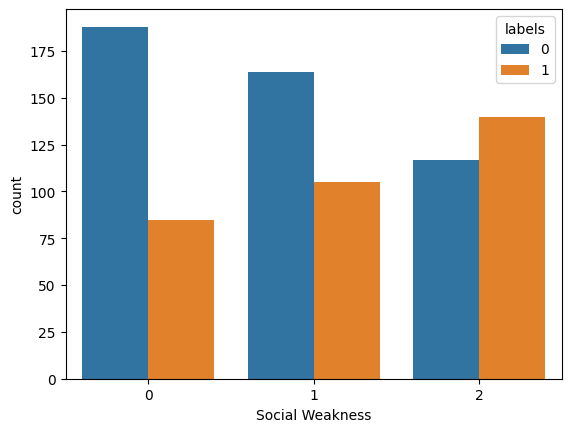

In [24]:
df['labels']=kmeans.fit_predict(pca_df)
for c in ['Age', 'Sex', 'Occupation', 'Days Indoors', 'Growing Stress',
       'Quarantine Frustrations', 'Changes Habits', 'Mental Health History',
       'Weight Change', 'Mood Swings', 'Coping Struggles', 'Work Interest',
       'Social Weakness']:
    sns.countplot(x=c,data=df,hue='labels')
    plt.show()

**Findings**

* preprocessing 
* polynomial feature extraction
* scaling
* dimensionality reduction
* clustering 

but
got moderate evaluation score that need to try another clustering techniques or feature engineering or ensemble techniques 